In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Customer Churn Analysis and Data Augmentation Notebook

## README

This notebook performs customer churn analysis and data augmentation on a customer dataset. It includes the following main components:

1. Data Loading: Loads the original training and testing datasets.
2. Feature Engineering: Adds new features to the dataset to enhance the analysis.
3. Data Augmentation: Creates synthetic data to expand the dataset, including:
   - Adding noise to numerical features
   - Introducing anomalies
   - Adding missing values
4. Visualization: Generates various plots to compare the original and augmented datasets, including:
   - Distribution comparisons
   - Correlation heatmaps
   - Churn rate by categorical features
   - Feature importance
   - Scatter plots and box plots of key features

### How to Use

1. Ensure you have the required libraries installed (see requirements.txt).
2. Update the file paths in the `main()` function to point to your data files.
3. Run the entire notebook.
4. Examine the printed data samples and shapes, as well as the generated visualizations.

### Key Functions

- `load_data()`: Loads the datasets
- `add_features()`: Adds new features to the data
- `augment_data()`: Creates an augmented dataset
- `create_visualizations()`: Generates various plots for analysis

# Read in data and create additional features

In [4]:
# Load the datasets
train_data_path = '../data/customer_churn_dataset-training-master.csv'
test_data_path = '../data/customer_churn_dataset-testing-master.csv'


train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)


In [5]:
train_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [6]:
test_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [7]:
def add_features(data):
    """
    Add new features to the dataset.
    """
    # Tenure in Years
    data['Tenure_Years'] = data['Tenure'] / 12
    
    # Monthly Spend
    data['Monthly_Spend'] = data['Total Spend'] / data['Tenure']
    
    # Interaction Frequency
    data['Interaction_Frequency'] = data['Usage Frequency'] / data['Tenure']
    
    # Support Call Rate
    data['Support_Call_Rate'] = data['Support Calls'] / data['Tenure']
    
    # Payment Delay Rate
    data['Payment_Delay_Rate'] = data['Payment Delay'] / data['Tenure']
    
    # Customer Loyalty
    data['Loyal_Customer'] = data['Tenure'].apply(lambda x: 1 if x > 24 else 0)
    
    return data

# Sample data and create synthetic data with noise and additional missing values - to make it a bit more intersting

In [8]:
# Set a random seed for reproducibility
np.random.seed(42)

In [ ]:
def create_synthetic_data(original_data, synth_size):
    """
    Create synthetic data by sampling from the original data and adding noise.
    """
    # Sample rows from the original data with replacement
    synthetic_data = original_data.sample(n=synth_size, replace=True).reset_index(drop=True)
    
    # Add noise to numerical columns
    noise_factor = 0.05  # 5% random noise
    numeric_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 
                       'Total Spend', 'Last Interaction', 'Tenure_Years', 'Monthly_Spend', 
                       'Interaction_Frequency', 'Support_Call_Rate', 'Payment_Delay_Rate']
    
    for column in numeric_columns:
        synthetic_data[column] = synthetic_data[column] * (1 + noise_factor * np.random.randn(synth_size))
    
    return synthetic_data

In [ ]:
def introduce_anomalies(data, anomaly_ratio=0.01):
    """
    Introduce anomalies by setting extreme values for certain features.
    """
    anomaly_indices = np.random.choice(len(data), size=int(anomaly_ratio * len(data)), replace=False)
    data.loc[anomaly_indices, 'Support Calls'] = data['Support Calls'].max() * 5
    data.loc[anomaly_indices, 'Total Spend'] = data['Total Spend'].max() * 10
    return data

In [ ]:
def introduce_missing_values(data, missing_ratio=0.03):
    """
    Introduce missing values in specified columns.
    """
    columns_with_missing = ['Age', 'Gender', 'Tenure', 'Payment Delay', 'Last Interaction']
    for column in columns_with_missing:
        missing_indices = np.random.choice(len(data), size=int(missing_ratio * len(data)), replace=False)
        data.loc[missing_indices, column] = np.nan
    return data

In [ ]:
def augment_data(original_data, augmentation_factor=9):
    """
    Create an augmented dataset by combining original and synthetic data.
    """
    synth_size = len(original_data) * augmentation_factor
    synthetic_data = create_synthetic_data(original_data, synth_size)
    synthetic_data = introduce_anomalies(synthetic_data)
    synthetic_data = introduce_missing_values(synthetic_data)
    augmented_data = pd.concat([original_data, synthetic_data], axis=0).reset_index(drop=True)
    return augmented_data

In [9]:
# Add new features
train_data = add_features(train_data)
test_data = add_features(test_data)

# Create augmented dataset
augmented_data = augment_data(train_data)

# Print sample of original and augmented data
print("Original Data Sample:")
print(train_data.head())
print("\nAugmented Data Sample:")
print(augmented_data.head())

# Print shape of original and augmented data
print(f"\nOriginal Data Shape: {train_data.shape}")
print(f"Augmented Data Shape: {augmented_data.shape}")

augmented_data.to_csv("../data/augmented-training data.csv")

In [25]:
augmented_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_Years,Monthly_Spend,Interaction_Frequency,Support_Call_Rate,Payment_Delay_Rate,Loyal_Customer
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,3.250000,23.897436,0.358974,0.128205,0.461538,1
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,4.083333,11.367347,0.020408,0.204082,0.163265,1
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,1.166667,13.214286,0.285714,0.428571,1.285714,0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,3.166667,10.421053,0.552632,0.184211,0.184211,1
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,2.666667,19.281250,0.625000,0.156250,0.250000,1


In [26]:
augmented_data.to_csv("../data/augmented-training data.csv")

# Compare the original and augmented dataset

In [15]:
# Set the style for all plots
plt.style.use('seaborn')

C:\Users\david\AppData\Local\Temp\ipykernel_16256\3490226161.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [16]:
def compare_distributions(original_data, augmented_data, columns, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.kdeplot(data=original_data, x=col, ax=axes[i], label='Original', color='blue')
        sns.kdeplot(data=augmented_data, x=col, ax=axes[i], label='Augmented', color='red')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

In [17]:
def plot_correlation_heatmap(data, title):
    plt.figure(figsize=(12, 10))
    corr = data.select_dtypes(include=[np.number]).corr()
    sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(title)
    plt.show()

In [18]:
def plot_churn_rate_by_category(data, category, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category, y='Churn', data=data, estimator=lambda x: (x == 1).mean() * 100)
    plt.title(title)
    plt.ylabel('Churn Rate (%)')
    plt.xticks(rotation=45)
    plt.show()


In [19]:
def plot_feature_importance(data):

    # Prepare the data
    X = data.drop('Churn', axis=1)
    y = data['Churn']

    # Encode categorical variables
    le = LabelEncoder()
    X['Gender'] = le.fit_transform(X['Gender'])

    # Train a Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Plot feature importance
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

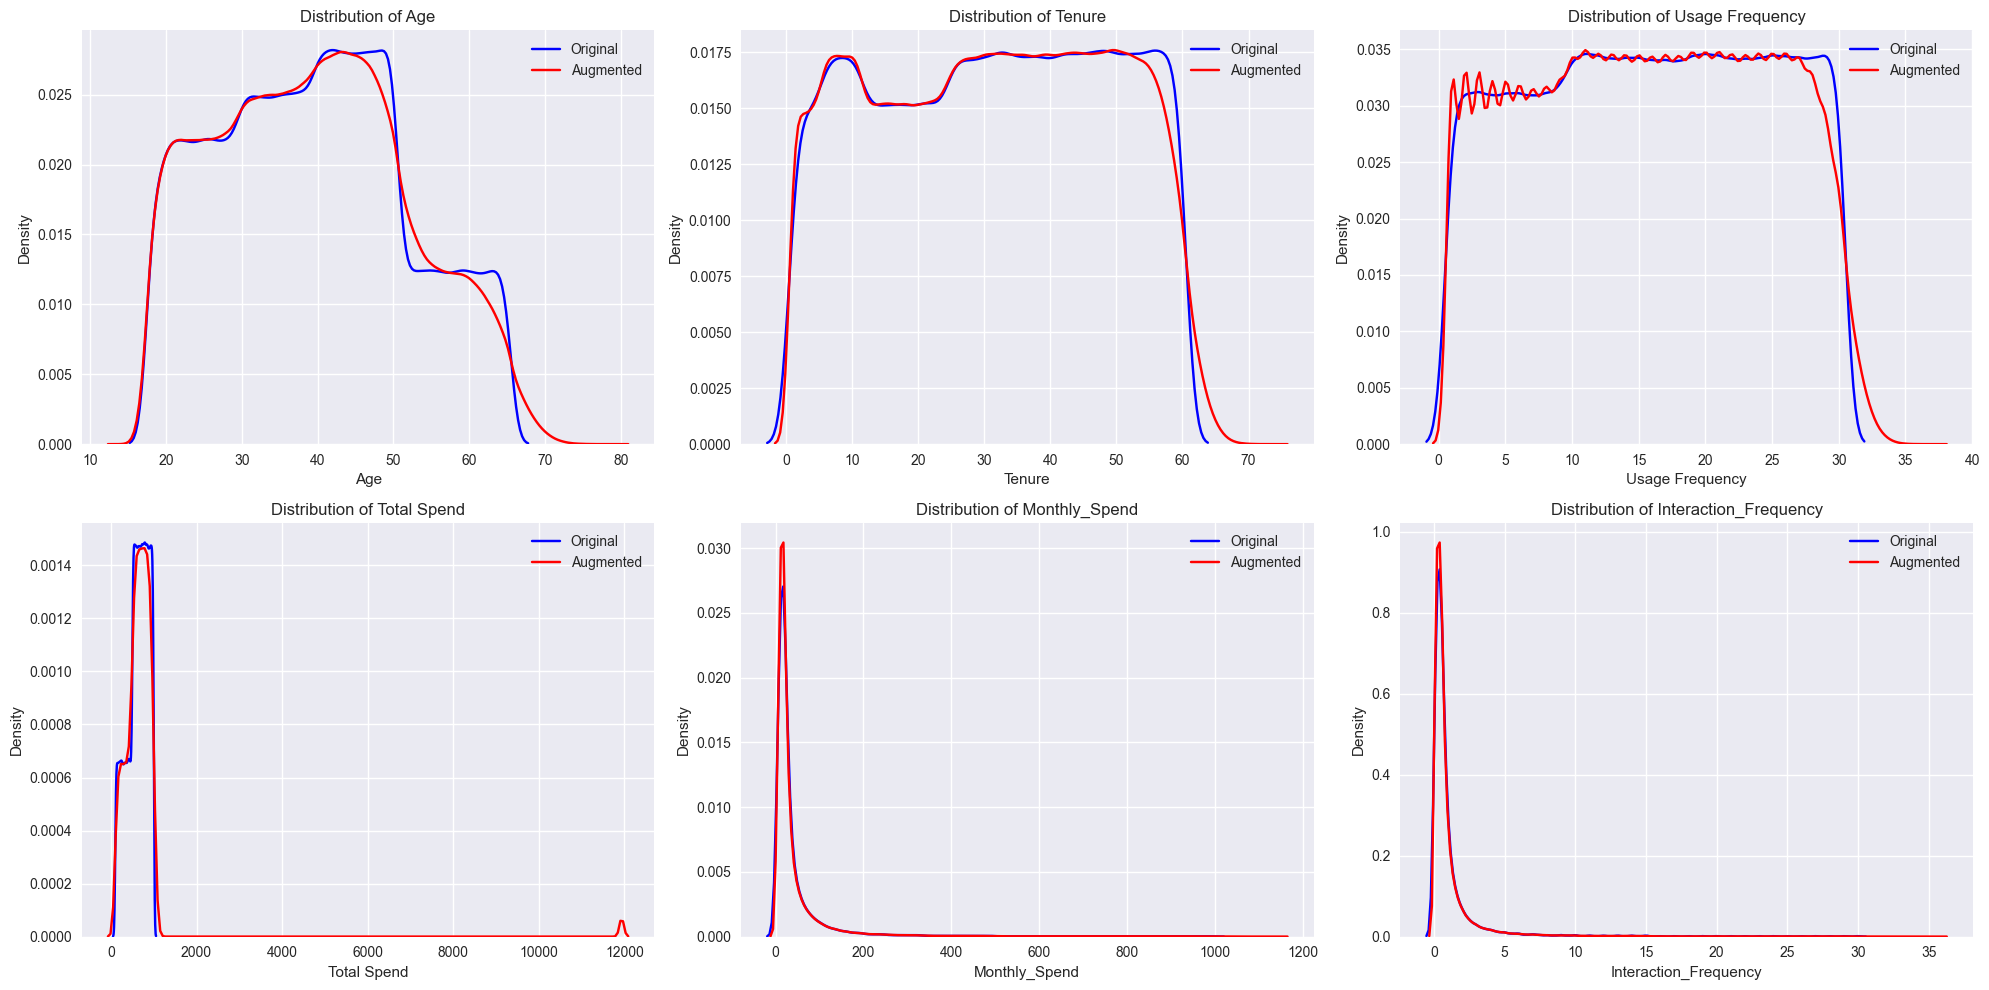

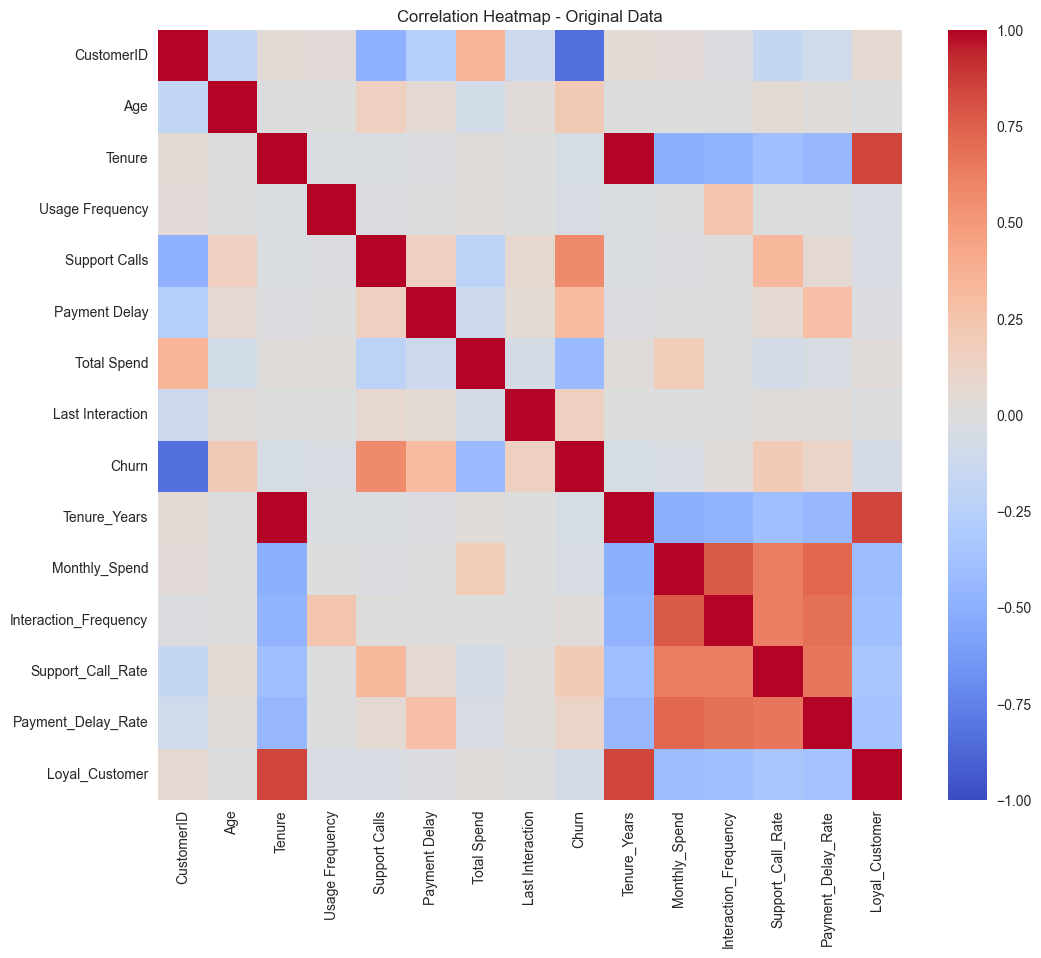

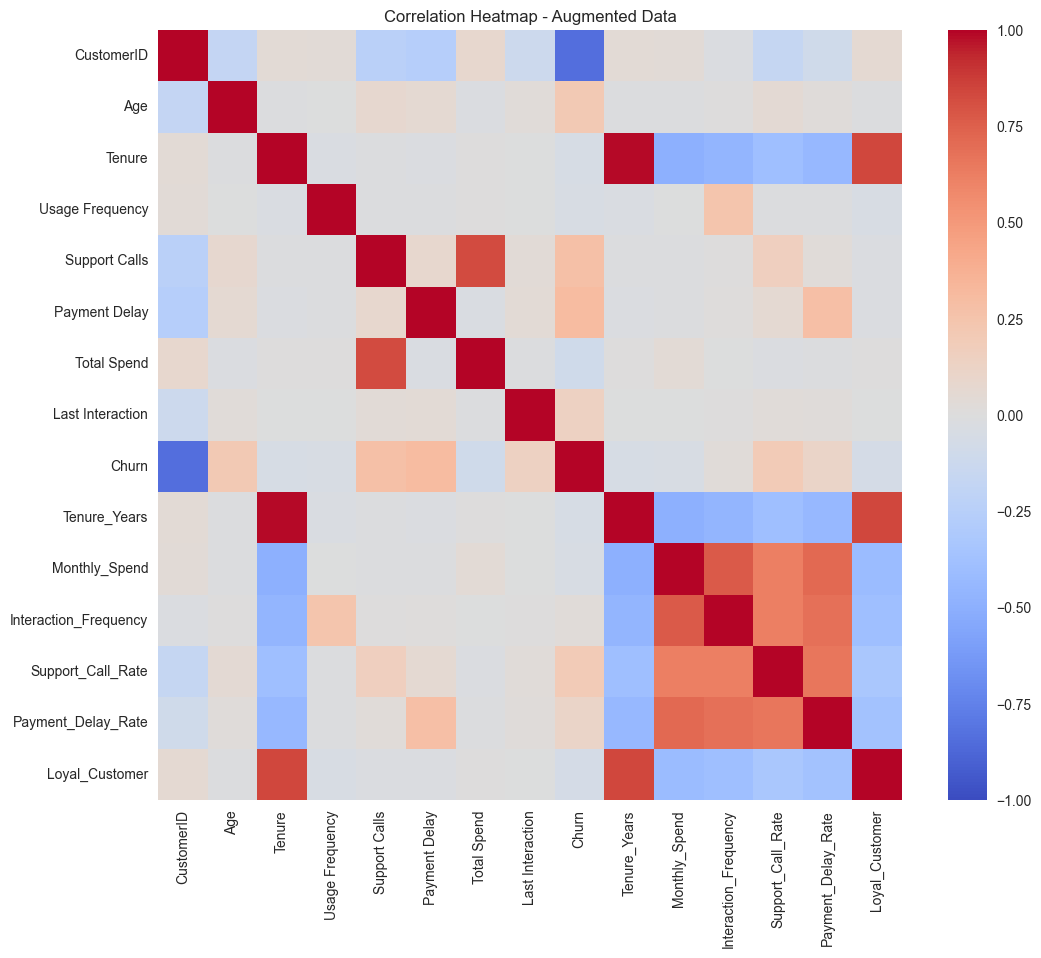

In [20]:
# Compare distributions of key numerical features
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Total Spend', 'Monthly_Spend', 'Interaction_Frequency']
compare_distributions(train_data, augmented_data, numerical_features, 2, 3)

# Plot correlation heatmaps
plot_correlation_heatmap(train_data, 'Correlation Heatmap - Original Data')
plot_correlation_heatmap(augmented_data, 'Correlation Heatmap - Augmented Data')

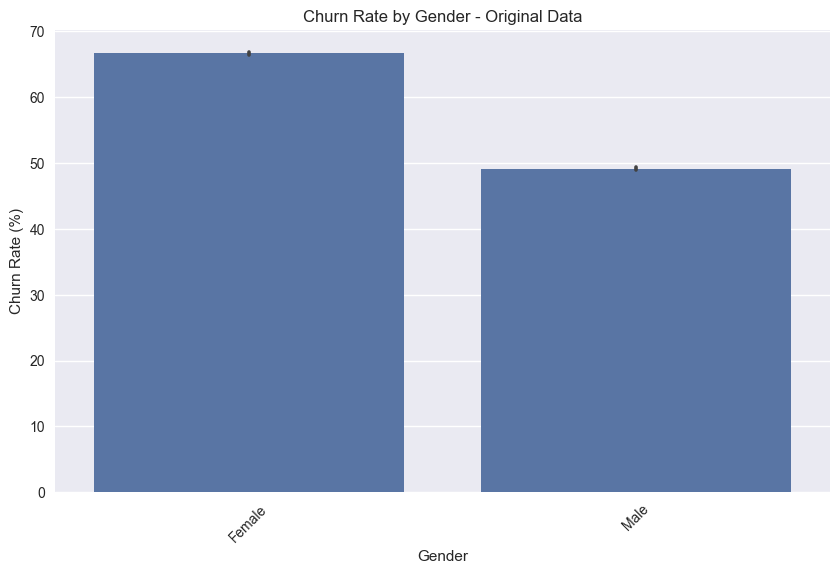

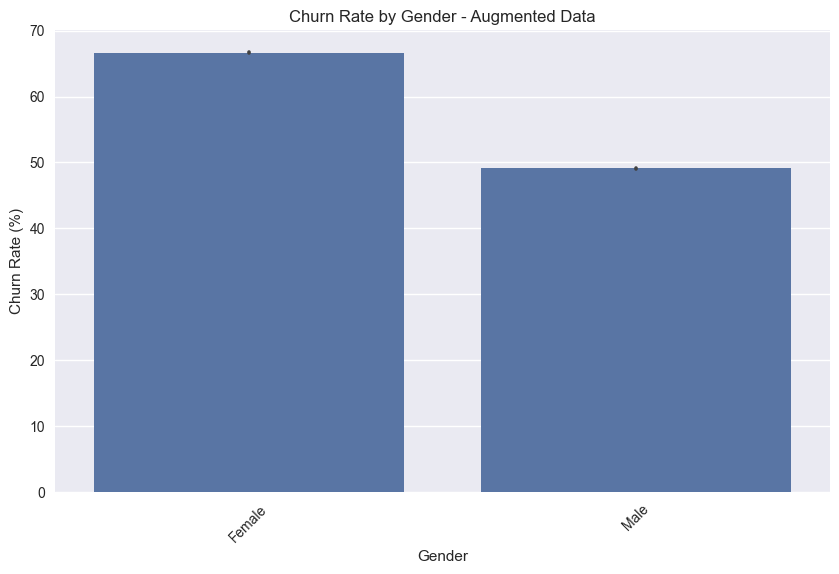

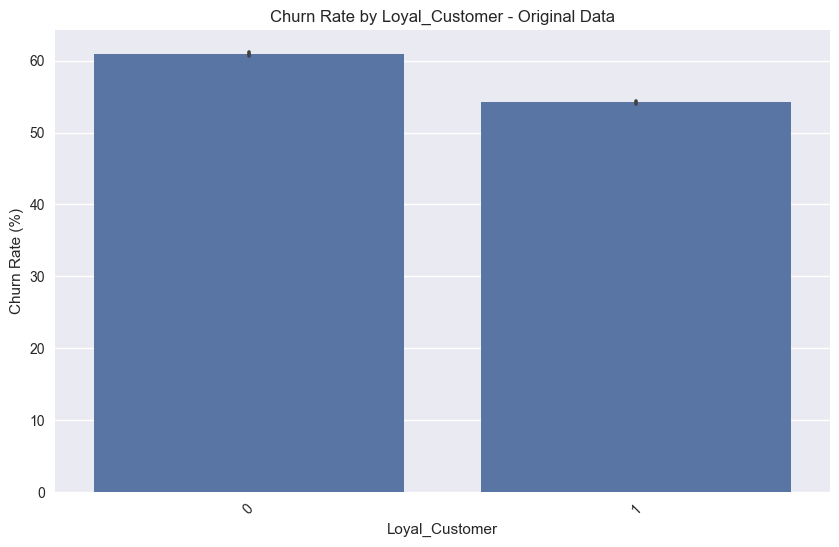

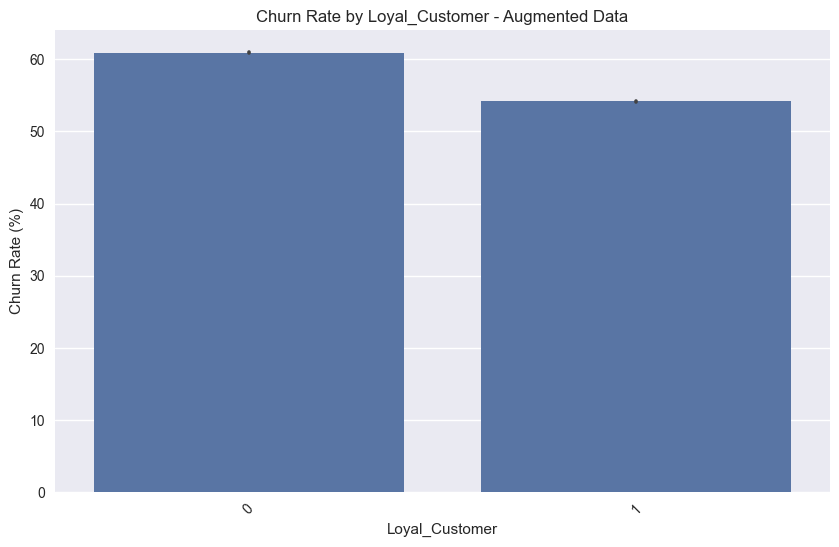

In [21]:
# Plot churn rate by categorical features
categorical_features = ['Gender', 'Loyal_Customer']
for feature in categorical_features:
    plot_churn_rate_by_category(train_data, feature, f'Churn Rate by {feature} - Original Data')
    plot_churn_rate_by_category(augmented_data, feature, f'Churn Rate by {feature} - Augmented Data')


C:\Users\david\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


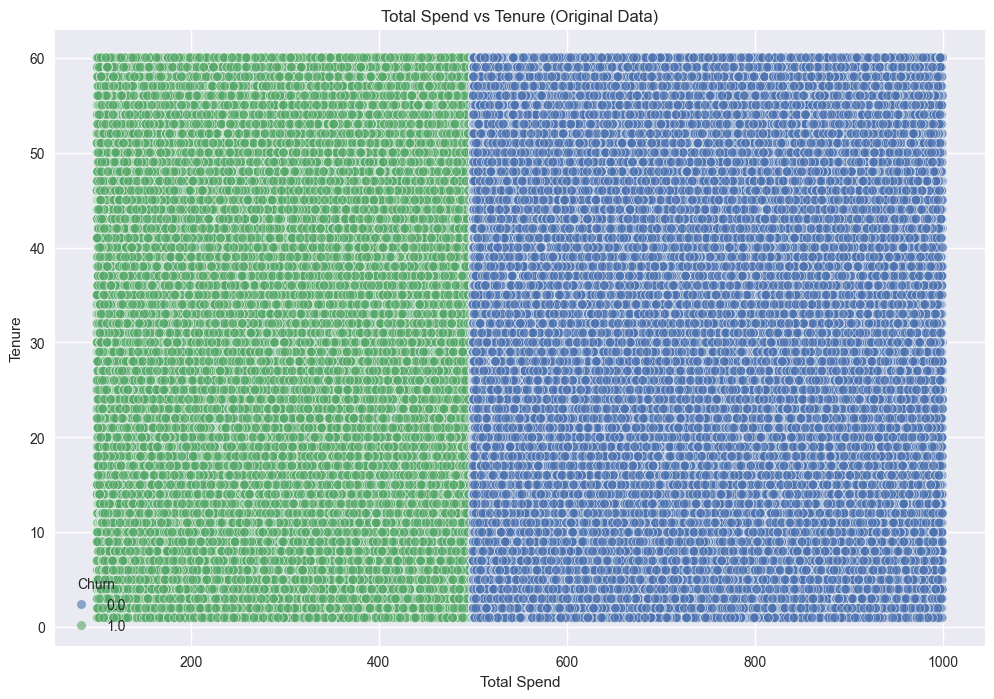

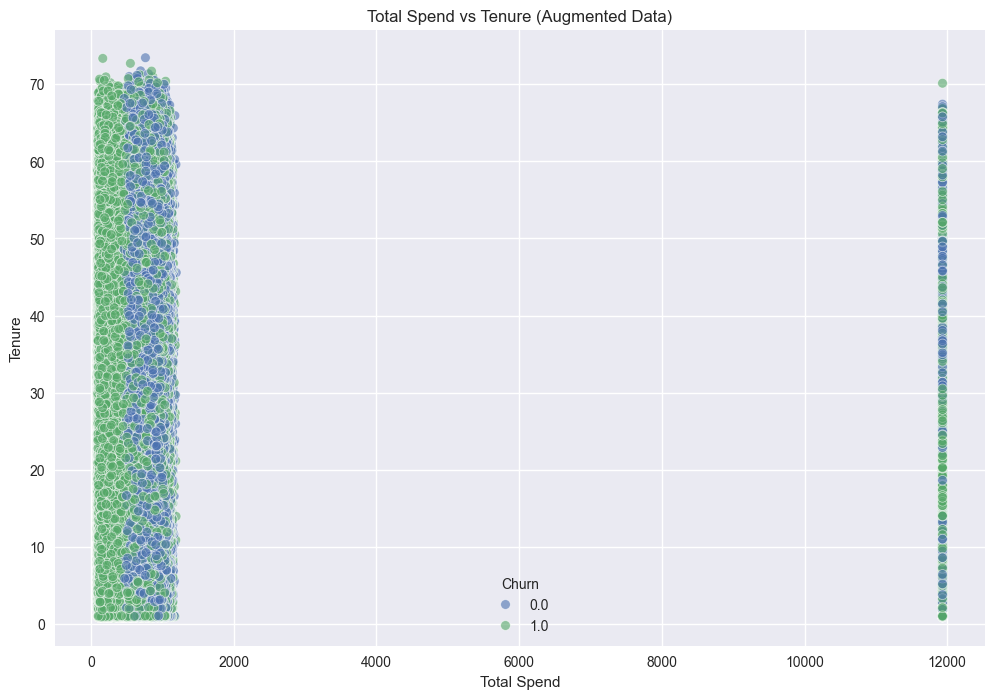

In [23]:
# Scatter plot of Total Spend vs Tenure, colored by Churn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=train_data, x='Total Spend', y='Tenure', hue='Churn', alpha=0.6)
plt.title('Total Spend vs Tenure (Original Data)')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=augmented_data, x='Total Spend', y='Tenure', hue='Churn', alpha=0.6)
plt.title('Total Spend vs Tenure (Augmented Data)')
plt.show()


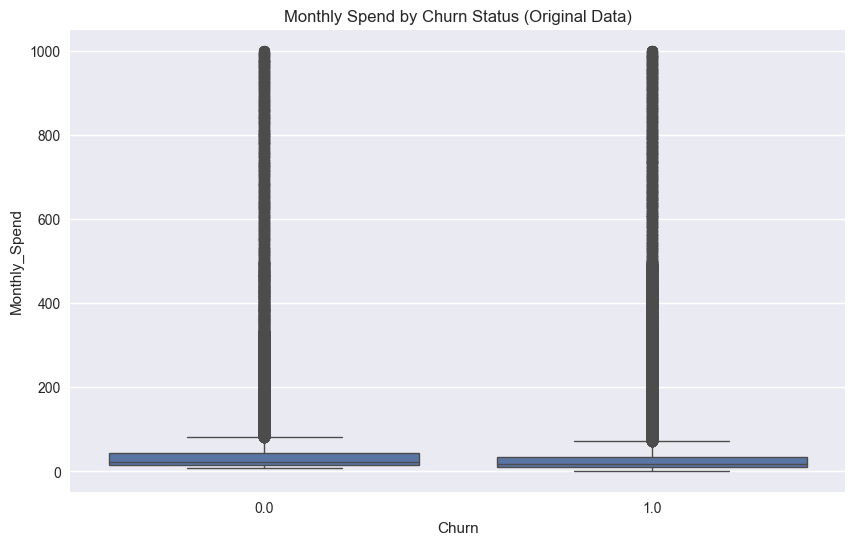

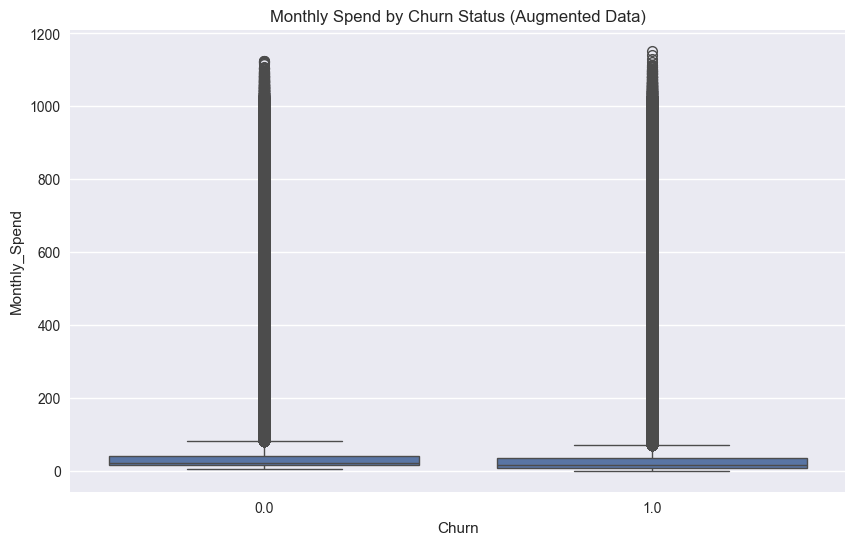

In [24]:
# Box plot of Monthly Spend by Churn status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Monthly_Spend', data=train_data)
plt.title('Monthly Spend by Churn Status (Original Data)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Monthly_Spend', data=augmented_data)
plt.title('Monthly Spend by Churn Status (Augmented Data)')
plt.show()